<a href="https://colab.research.google.com/github/sidh26/DL-Assignments/blob/master/test/Test1_J042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


# Step 1 & 2

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [0]:
print(X_train.shape, X_test.shape, X_val.shape)

(37500, 32, 32, 3) (10000, 32, 32, 3) (12500, 32, 32, 3)


In [0]:
NUM_ROWS = 32
NUM_COLS = 32
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [0]:
X_train = X_train.reshape(37500, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)
X_val = X_val.reshape(12500, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255.0
X_test /= 255.0
X_val /= 255.0

y_train = to_categorical(y_train, 10)
y_test =  to_categorical(y_test, 10)
y_val =  to_categorical(y_val, 10)

# Step 3

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS * 3,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Step 4

In [0]:
import keras.optimizers
sgd=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)
rms=keras.optimizers.RMSprop(lr=0.001, rho=0.9)
ada=keras.optimizers.Adagrad(lr=0.01)
adelta=keras.optimizers.Adadelta(lr=1.0, rho=0.95)
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
nadam=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)

In [0]:
opts = [sgd,rms,ada,adelta,adam,adamax,nadam]
for opt in opts:
    model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    # Train model
    model.fit(X_train, y_train,
            batch_size=BATCH_SIZE,
            epochs=EPOCHS,
            verbose=0,
            validation_data=(X_val, y_val))

    score = model.evaluate(X_test, y_test, verbose=0)
    print(opt)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Test loss: 1.5671521633148193
Test accuracy: 0.4539
Test loss: 1.4929165321350097
Test accuracy: 0.4727
Test loss: 1.393716153526306
Test accuracy: 0.5153
Test loss: 1.5885461589813232
Test accuracy: 0.4639
Test loss: 1.5093727792739868
Test accuracy: 0.5064
Test loss: 1.659330673789978
Test accuracy: 0.5034
Test loss: 1.7754381233215333
Test accuracy: 0.4925


In [0]:
best_opt = sgd
print(best_opt)

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS * 3,)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
	# Compile model
    optimizer = keras.optimizers.SGD(lr=learn_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


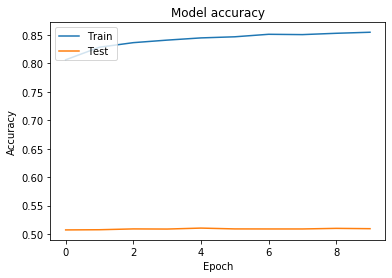

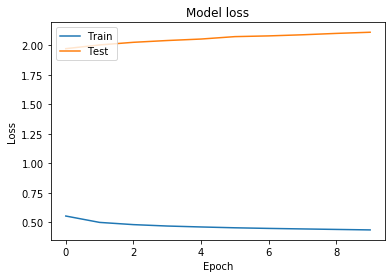

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(best.history['acc'])
plt.plot(best.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(best.history['loss'])
plt.plot(best.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


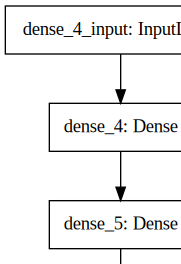

In [0]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))